STT:

Họ và tên: Hoàng Minh Nhật

Lớp:

Buổi - Bài Lab03


## Câu 1: Thực hiện phân tích thăm dò và tìm ra các biến ảnh hưởng nhất đến giá xe

### Tải bộ dữ liệu và kiểm tra thông tin ban đầu

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
try:
    df = pd.read_csv('/content/Model_Evaluation_V1.csv')
    print("Đã tải dữ liệu từ local path thành công!")
except Exception as e_local:
    print(f"Lỗi khi tải dữ liệu từ local path: {e_local}")
    df = None

if df is not None:
    # Kích cỡ bộ dữ liệu
    print(f"Kích cỡ bộ dữ liệu: {df.shape[0]} hàng, {df.shape[1]} cột")

    # 5 dòng đầu tiên của bộ dữ liệu
    print("\n5 dòng đầu tiên của bộ dữ liệu:")
    display(df.head())

    # Thông tin về các cột, kiểu dữ liệu và giá trị thiếu
    print("\nThông tin bộ dữ liệu:")
    display(df.info())

    # Thống kê mô tả cho các cột số
    print("\nThống kê mô tả cho các biến số:")
    display(df.describe())

    # Ý nghĩa từng biến/cột (Đây là phần giải thích thủ công, sẽ viết trong text cell tiếp theo)
    # Xác định các cột kiểu số và kiểu phân loại
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    print("\nCác biến kiểu số:", numerical_features)
    print("Các biến kiểu phân loại:", categorical_features)

Đã tải dữ liệu từ local path thành công!
Kích cỡ bộ dữ liệu: 200 hàng, 29 cột

5 dòng đầu tiên của bộ dữ liệu:


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,1,104,mazda,std,two,hatchback,fwd,front,93.1,0.764536,...,9.0,68.0,5000.0,31,38,6095,7.580645,Low,0,1
1,0,115,mazda,std,four,hatchback,fwd,front,98.8,0.854397,...,8.6,84.0,4800.0,26,32,11245,9.038462,Low,0,1
2,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,9.4,135.0,6000.0,16,23,15645,14.687500,Medium,0,1
3,0,102,subaru,std,four,sedan,fwd,front,97.2,0.826526,...,9.0,94.0,5200.0,26,32,9960,9.038462,Low,0,1
4,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,110.0,0.917347,...,21.5,123.0,4350.0,22,25,25552,10.681818,Medium,1,0



Thông tin bộ dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   aspiration         200 non-null    object 
 4   num-of-doors       200 non-null    object 
 5   body-style         200 non-null    object 
 6   drive-wheels       200 non-null    object 
 7   engine-location    200 non-null    object 
 8   wheel-base         200 non-null    float64
 9   length             200 non-null    float64
 10  width              200 non-null    float64
 11  height             200 non-null    float64
 12  curb-weight        200 non-null    int64  
 13  engine-type        200 non-null    object 
 14  num-of-cylinders   200 non-null    object 
 15  engine-size        200 non-null    int64  
 16  fue

None


Thống kê mô tả cho các biến số:


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.845000,122.000000,98.686500,0.836288,0.914722,53.752000,2548.945000,125.970000,3.328345,3.256350,10.175100,103.002562,5120.753695,25.235000,30.760000,13068.365000,9.909938,0.100000,0.900000
std,1.256531,32.076542,5.875241,0.058222,0.028693,2.445095,509.719168,39.612306,0.266667,0.316772,4.012069,37.019020,477.299481,6.390144,6.752063,7719.029462,2.494010,0.300753,0.300753
min,-2.000000,65.000000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,0.890278,52.000000,2163.000000,97.750000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.000000,96.950000,0.832292,0.909722,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.684729,24.000000,30.000000,10270.000000,9.791667,0.000000,1.000000
75%,2.000000,138.250000,102.400000,0.880346,0.923958,55.500000,2922.250000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.000000,115.600000,0.973570,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000



Các biến kiểu số: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas']
Các biến kiểu phân loại: ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']


### Ý nghĩa từng biến/cột

*   **symboling**: Mức độ rủi ro của xe (+3 rủi ro nhất, -3 an toàn nhất).
*   **normalized-losses**: Chỉ số tổn thất được chuẩn hóa theo tỷ lệ.
*   **make**: Hãng sản xuất xe.
*   **aspiration**: Loại hút khí (std - tiêu chuẩn, turbo - tăng áp).
*   **num-of-doors**: Số cửa (two - hai cửa, four - bốn cửa).
*   **body-style**: Kiểu dáng thân xe (hardtop, wagon, sedan, hatchback, convertible).
*   **drive-wheels**: Hệ dẫn động (4wd - 4 bánh, fwd - cầu trước, rwd - cầu sau).
*   **engine-location**: Vị trí động cơ (front - phía trước, rear - phía sau).
*   **wheel-base**: Chiều dài cơ sở của xe.
*   **length**: Chiều dài tổng thể của xe.
*   **width**: Chiều rộng tổng thể của xe.
*   **height**: Chiều cao tổng thể của xe.
*   **curb-weight**: Trọng lượng không tải của xe.
*   **engine-type**: Loại động cơ.
*   **num-of-cylinders**: Số xy lanh.
*   **engine-size**: Dung tích động cơ.
*   **fuel-system**: Hệ thống nhiên liệu.
*   **bore**: Đường kính xi lanh.
*   **stroke**: Hành trình piston.
*   **compression-ratio**: Tỷ số nén.
*   **horsepower**: Công suất động cơ.
*   **peak-rpm**: Vòng tua cực đại.
*   **city-mpg**: Mức tiêu thụ nhiên liệu trong thành phố (miles per gallon).
*   **highway-mpg**: Mức tiêu thụ nhiên liệu trên đường cao tốc (miles per gallon).
*   **price**: Giá xe (biến mục tiêu).
*   **city-L/100km**: Mức tiêu thụ nhiên liệu trong thành phố (lít/100km).
*   **horsepower-binned**: Công suất động cơ được phân loại thành các nhóm.
*   **diesel**: Biến giả cho loại nhiên liệu diesel (1 nếu là diesel, 0 nếu không).
*   **gas**: Biến giả cho loại nhiên liệu xăng (1 nếu là xăng, 0 nếu không).

### Đánh giá giá trị ngoại lệ (Outlier Analysis)

Chúng ta có thể sử dụng biểu đồ box plot để trực quan hóa sự phân bố của các biến số và xác định các giá trị ngoại lệ.

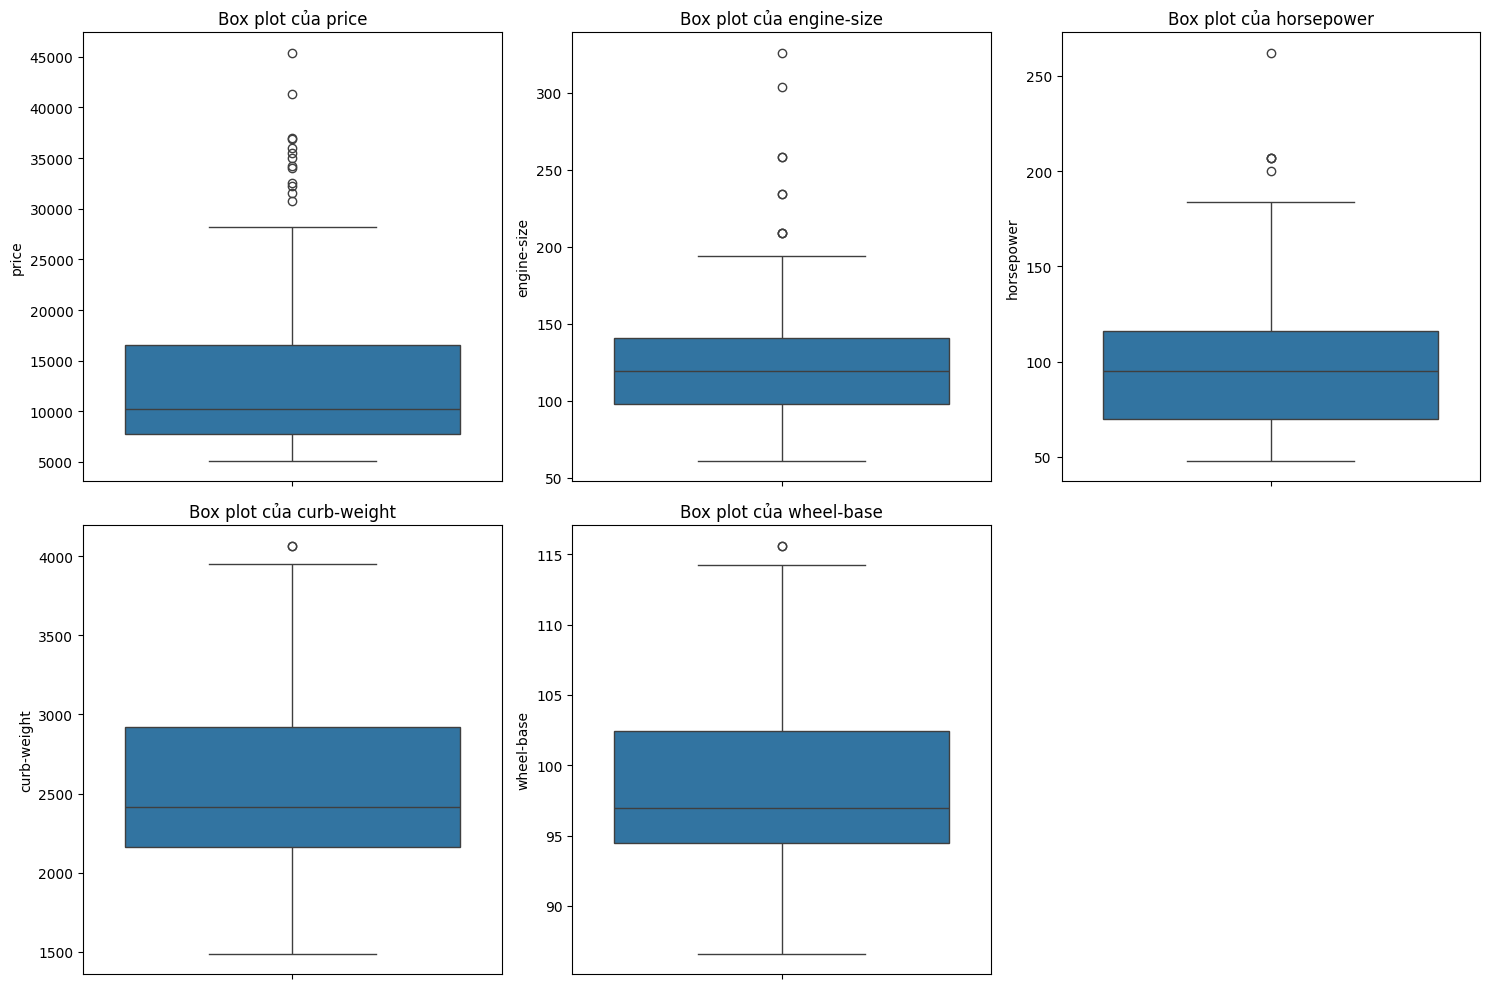

In [20]:
# Vẽ box plot cho một số biến số quan trọng có khả năng chứa ngoại lệ
variables_to_plot = ['price', 'engine-size', 'horsepower', 'curb-weight', 'wheel-base']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Box plot của {var}')
plt.tight_layout()
plt.show()

Ta có thể thấy Phần lớn các xe có giá tập trung ở khoảng dưới 17,000 đô.

Tuy nhiên, Có một số lượng đáng kể các giá trị ngoại lệ ở phía trên, với một số xe có giá trên 30,000 đô và thậm chí là 45,000 đô. Đây là những chiếc xe sang hoặc xe thể thao, có giá cao hơn hẳn so với mặt bằng chung.

Điều tương tự cũng có thể được tìm ra ở các biến ở curb-weight và wheel-base, hay engine-size và horsepower

Ta có thể thấy: Sự tồn tại của một phân khúc xe cao cấp (giá cao, động cơ lớn, mã lực mạnh) như những "giá trị ngoại lệ" so với phần còn lại của thị trường.

### Phân tích tương quan (Correlation Analysis)

Chúng ta sẽ tính toán và trực quan hóa ma trận tương quan giữa các biến kiểu số và giá xe để xem mối quan hệ tuyến tính của chúng.


Ma trận tương quan với biến 'price':


,price
price,1.000000
engine-size,0.863675
curb-weight,0.828328
horsepower,0.805993
city-L/100km,0.780811
width,0.739666
length,0.675966
wheel-base,0.556307
bore,0.533016
normalized-losses,0.138304



Biểu đồ Heatmap tương quan:


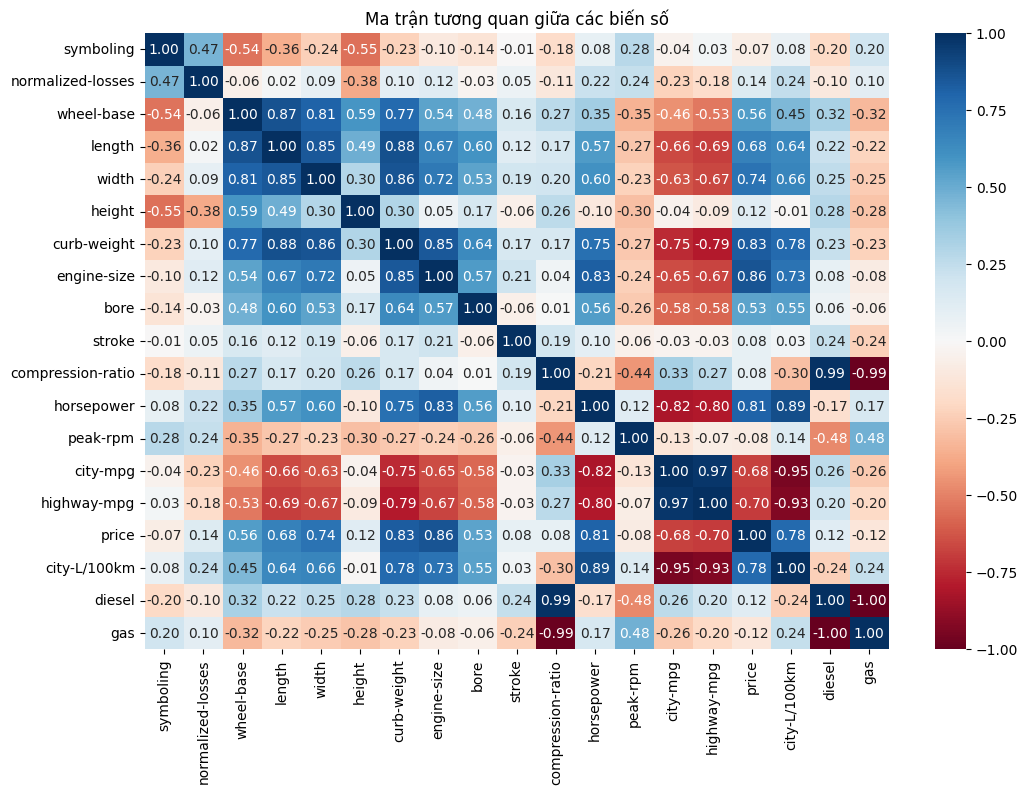

In [25]:
# Tính ma trận tương quan cho các biến kiểu số (bao gồm cả 'price')
correlation_matrix = df[numerical_features].corr()

# Hiển thị ma trận tương quan (chỉ tập trung vào cột 'price')
print("\nMa trận tương quan với biến 'price':")
display(correlation_matrix[['price']].sort_values(by='price', ascending=False))

# Vẽ heatmap để trực quan hóa toàn bộ ma trận tương quan với cmap='RdBu'
print("\nBiểu đồ Heatmap tương quan:")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu' , fmt=".2f")
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

### Phân tích ANOVA

Đối với các biến phân loại, ta sử dụng phân tishc ANOVA để kiểm tra sự khác biệt về giá trung bình giữa các nhóm khác nhau. Biến có p-value < 0.05 được coi là có ảnh hưởng đáng kể đến giá xe.

Ta chọn 4 biến phân loại make, body-style, drive-wheels, engine-location dựa vào kiến thức trong ngành rằng các yếu tố như nhà sản xuất, kiểu dáng, bộ dẫn động và vị trí động cơ thường có ảnh hưởng lớn đến giá.

In [28]:
anova_features = ['make', 'body-style', 'drive-wheels', 'engine-location']

print("\n--- Kết quả phân tích ANOVA ---")

for feature in anova_features:
    if feature in categorical_features:
        try:
            # Chuẩn bị dữ liệu cho ANOVA
            # Loại bỏ các nhóm chỉ có 1 mẫu nếu có
            groups = df[[feature, 'price']].groupby(feature)
            valid_groups = [name for name, group in groups if len(group) > 1]
            # Lọc dữ liệu chỉ với các nhóm hợp lệ và đảm bảo cột 'price' là số
            anova_data = df[df[feature].isin(valid_groups)].copy()
            anova_data['price'] = pd.to_numeric(anova_data['price'], errors='coerce')
            anova_data.dropna(subset=['price'], inplace=True) # Loại bỏ hàng có giá trị price thiếu sau khi chuyển đổi

            # Xây dựng ma trận thiết kế sử dụng patsy.dmatrix
            # Sử dụng tên biến trong công thức
            formula = 'price ~ C(`{}`)'.format(feature)
            y, X = patsy.dmatrices(formula, data=anova_data, return_type='dataframe')

            # Xây dựng mô hình OLS (Ordinary Least Squares)
            model = sm.OLS(y, X).fit()

            # Thực hiện ANOVA
            anova_table = sm.stats.anova_lm(model, typ=2)

            print(f"\nANOVA cho biến '{feature}':")
            display(anova_table)

            # Nhận xét về kết quả
            if 'PR(>F)' in anova_table.columns:
                p_value = anova_table['PR(>F)'][0]
                f_value = anova_table['F'][0] if 'F' in anova_table.columns else 'N/A'
                print(f"F-value: {f_value}, p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print(f"Kết luận: Biến '{feature}' có ảnh hưởng đáng kể đến giá xe (p-value < 0.05).")
                else:
                    print(f"Kết luận: Biến '{feature}' không có ảnh hưởng đáng kể đến giá xe (p-value >= 0.05).")
            else:
                print(f"Không tìm thấy cột 'PR(>F)' trong bảng ANOVA cho biến '{feature}'.")


        except Exception as e:
            print(f"Không thể thực hiện ANOVA cho biến '{feature}': {e}")
    else:
        print(f"Biến '{feature}' không phải là biến phân loại và bị bỏ qua trong ANOVA.")


--- Kết quả phân tích ANOVA (sử dụng scipy.stats.f_oneway) ---

ANOVA cho biến 'make':
  F-value: 32.9787
  p-value: 0.0000
  Kết luận: Biến 'make' có ảnh hưởng đáng kể đến giá xe (p-value < 0.05).

ANOVA cho biến 'body-style':
  F-value: 9.4157
  p-value: 0.0000
  Kết luận: Biến 'body-style' có ảnh hưởng đáng kể đến giá xe (p-value < 0.05).

ANOVA cho biến 'drive-wheels':
  F-value: 67.5308
  p-value: 0.0000
  Kết luận: Biến 'drive-wheels' có ảnh hưởng đáng kể đến giá xe (p-value < 0.05).

ANOVA cho biến 'engine-location':
  F-value: 26.5639
  p-value: 0.0000
  Kết luận: Biến 'engine-location' có ảnh hưởng đáng kể đến giá xe (p-value < 0.05).


## Câu 7: Xe thuộc hãng gì và kiểu dáng gì có giá trung bình cao

In [31]:
# Nhóm dữ liệu theo 'make' và tính giá trung bình của 'price'
avg_price_by_make = df_cleaned.groupby('make')['price'].mean()

# Sắp xếp kết quả theo giá trung bình giảm dần
avg_price_by_make = avg_price_by_make.sort_values(ascending=False)

# Hiển thị kết quả
print("Giá trung bình của xe theo hãng sản xuất:")
display(avg_price_by_make)

Giá trung bình của xe theo hãng sản xuất:


,price
make,
jaguar,34600.000000
mercedes-benz,32602.285714
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166667
mercury,16503.000000
alfa-romero,15498.333333
peugot,15489.090909


### Phân tích giá trung bình theo kiểu dáng


**Reasoning**:
Group the data by 'body-style', calculate the mean price for each body style, and sort the results.



In [32]:
# Nhóm dữ liệu theo 'body-style' và tính giá trung bình của 'price'
avg_price_by_bodystyle = df_cleaned.groupby('body-style')['price'].mean()

# Sắp xếp kết quả theo giá trung bình giảm dần
avg_price_by_bodystyle = avg_price_by_bodystyle.sort_values(ascending=False)

# Hiển thị kết quả
print("Giá trung bình của xe theo kiểu dáng thân xe:")
display(avg_price_by_bodystyle)

Giá trung bình của xe theo kiểu dáng thân xe:


,price
body-style,
hardtop,22208.500000
convertible,21890.500000
sedan,14174.806452
wagon,12371.960000
hatchback,9957.441176


### Phân tích giá trung bình kết hợp hãng và kiểu dáng

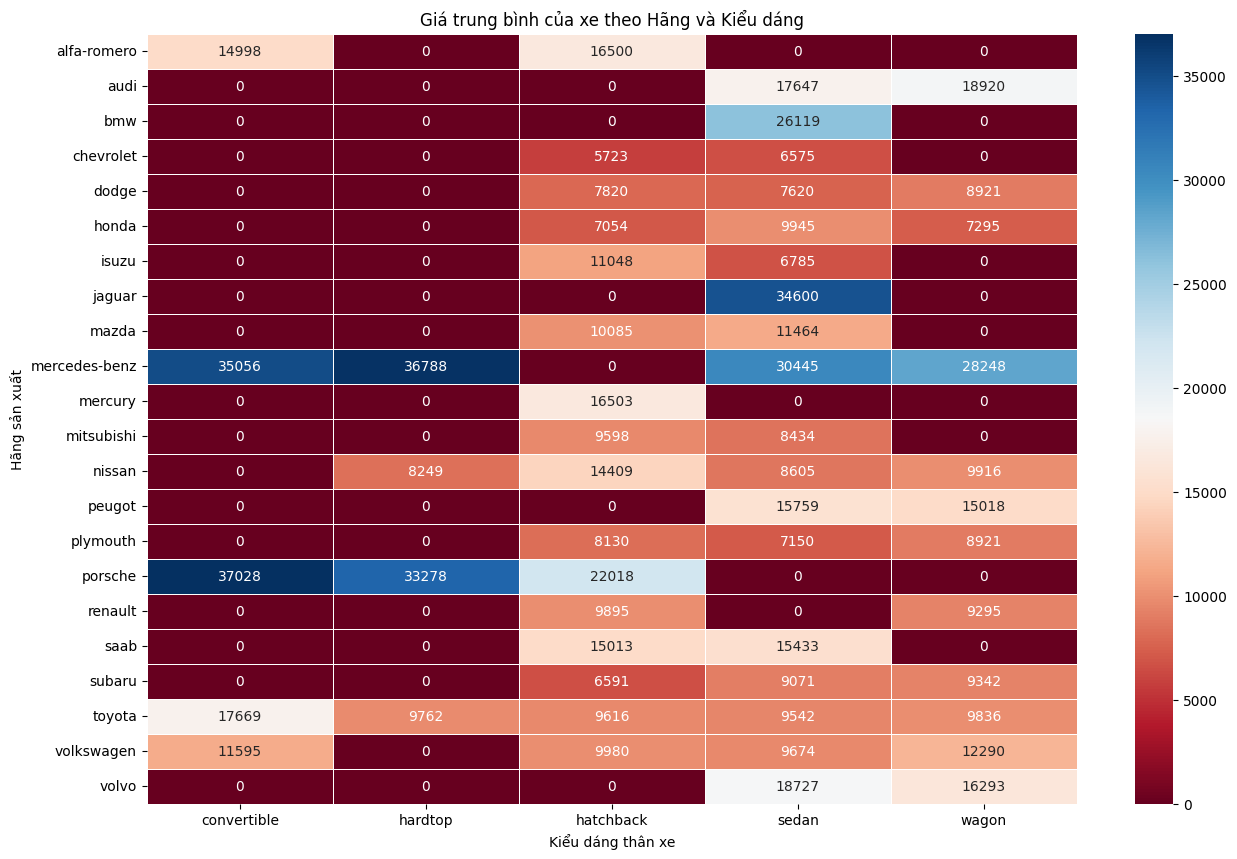

In [33]:
# Nhóm dữ liệu theo 'make' và 'body-style' và tính giá trung bình của 'price'
grouped_data = df_cleaned.groupby(['make', 'body-style'])['price'].mean()

# Chuyển đổi kết quả nhóm thành pivot table
# Sử dụng fillna(0) để điền các giá trị NaN (kết hợp make/body-style không tồn tại) bằng 0 cho trực quan hóa
pivot_table = grouped_data.unstack(fill_value=0)

# Vẽ heatmap để trực quan hóa giá trung bình
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='RdBu', linewidths=.5)
plt.title('Giá trung bình của xe theo Hãng và Kiểu dáng')
plt.xlabel('Kiểu dáng thân xe')
plt.ylabel('Hãng sản xuất')
plt.show()

In [36]:
# Nhận xét, lập luận và kết luận dựa trên các kết quả trước đó

print("Nhận xét")

# 1. Xác định hãng xe có giá trung bình cao nhất từ avg_price_by_make
highest_avg_make = avg_price_by_make.idxmax()
highest_avg_make_price = avg_price_by_make.max()

print(f"\nTừ phân tích giá trung bình theo hãng:")
print(f"Hãng xe có giá trung bình cao nhất là '{highest_avg_make}' với giá trung bình là {highest_avg_make_price:.0f} $.")

# 2. Xác định kiểu dáng xe có giá trung bình cao nhất từ avg_price_by_bodystyle
highest_avg_bodystyle = avg_price_by_bodystyle.idxmax()
highest_avg_bodystyle_price = avg_price_by_bodystyle.max()

print(f"\nTừ phân tích giá trung bình theo kiểu dáng:")
print(f"Kiểu dáng xe có giá trung bình cao nhất là '{highest_avg_bodystyle}' với giá trung bình là {highest_avg_bodystyle_price:.0f} $.")

# 3. Xác định cụ thể hãng xe và kiểu dáng nào có giá trung bình cao nhất từ heatmap (pivot_table)
# Tìm giá trị lớn nhất trong pivot_table
max_price_combined = pivot_table.max().max()

# Tìm vị trí (make, body-style) của giá trị lớn nhất
# Sử dụng idxmax() hai lần: lần đầu tìm cột (body-style) chứa giá trị max trong mỗi hàng, lần hai tìm hàng (make) có giá trị max trong cột đó.
# Cách khác đơn giản hơn là duyệt qua pivot table
highest_make_bodystyle = None
max_price_found = 0
for make in pivot_table.index:
    for bodystyle in pivot_table.columns:
        current_price = pivot_table.loc[make, bodystyle]
        if current_price > max_price_found:
            max_price_found = current_price
            highest_make_bodystyle = (make, bodystyle)

print(f"\nTừ phân tích giá trung bình kết hợp hãng và kiểu dáng (heatmap):")
print(f"Kết hợp giữa hãng '{highest_make_bodystyle[0]}' và kiểu dáng '{highest_make_bodystyle[1]}' có giá trung bình cao nhất là {max_price_found:.0f} $.")


Nhận xét

Từ phân tích giá trung bình theo hãng:
Hãng xe có giá trung bình cao nhất là 'jaguar' với giá trung bình là 34600 $.

Từ phân tích giá trung bình theo kiểu dáng:
Kiểu dáng xe có giá trung bình cao nhất là 'hardtop' với giá trung bình là 22208 $.

Từ phân tích giá trung bình kết hợp hãng và kiểu dáng (heatmap):
Kết hợp giữa hãng 'porsche' và kiểu dáng 'convertible' có giá trung bình cao nhất là 37028 $.


### Kết luận

Dựa trên phân tích, hãng xe có giá trung bình cao nhất nói chung là 'jaguar' (34600 $).

Kiểu dáng xe có giá trung bình cao nhất nói chung là 'hardtop' (22208 $).

Khi xem xét cả hai điều kiện, xe thuộc hãng 'porsche' với kiểu dáng 'convertible' có xu hướng có giá trung bình cao nhất (37028 $).

Các hãng xe sang (như Jaguar, Mercedes-Benz, Porsche) cùng với các kiểu dáng cao cấp hơn (như hardtop, convertible) có giá bán cao hơn đáng kể so với các phân khúc khác.

## Câu 2: Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy tuyến tính đơn biến và đa biến. đánh giá các mô hình bằng thang đo đã học

### Chuẩn bị dữ liệu: Chia tập huấn luyện và tập kiểm tra

In [44]:
from sklearn.model_selection import train_test_split

# đơn biến
# vì engine-size tương quan mạnh nhất, nên ta chọn làm biến độc lập
X_simple = df[['engine-size']]
y_simple = df['price']

# đa biến, chọn nhiều biến
# Chọn 3 biến có tương quan dương mạnh nhất và ít khả năng đa cộng tuyến cao
X_multiple = df[['engine-size', 'horsepower', 'curb-weight']]
y_multiple = df['price']


# chia dữ liệu
  # đơn biến
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

  # đa biến
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

print("Đã chia dữ liệu cho mô hình đơn biến và đa biến.")
print(f"Kích thước tập huấn luyện (đơn biến): {X_train_simple.shape}")
print(f"Kích thước tập kiểm tra (đơn biến): {X_test_simple.shape}")
print(f"Kích thước tập huấn luyện (đa biến): {X_train_multiple.shape}")
print(f"Kích thước tập kiểm tra (đa biến): {X_test_multiple.shape}")

Đã chia dữ liệu cho mô hình đơn biến và đa biến.
Kích thước tập huấn luyện (đơn biến): (160, 1)
Kích thước tập kiểm tra (đơn biến): (40, 1)
Kích thước tập huấn luyện (đa biến): (160, 3)
Kích thước tập kiểm tra (đa biến): (40, 3)


#### Xây dựng Mô hình Hồi quy Tuyến tính Đơn biến

theo hướng dẫn trong slide4_mo_hinh.pdf

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Khởi tạo LinearRegression
lm_simple = LinearRegression()

# 2. Xây dựng mô hình bằng phương thức fit() trên tập huấn luyện
lm_simple.fit(X_train_simple, y_train_simple)

# Lấy giá trị intercept (b0) và coefficients (b1)
b0_simple = lm_simple.intercept_
b1_simple = lm_simple.coef_[0]

print(f"Mô hình: price = {b0_simple:.2f} + {b1_simple:.2f} * engine-size")

# 3. Dự đoán giá trên tập kiểm tra
y_pred_simple = lm_simple.predict(X_test_simple)

# Dự đoán mẫu một vài giá trị
print("\nDự đoán mẫu trên tập kiểm tra:")
sample_indices = X_test_simple.head(5).index
sample_predictions = y_pred_simple[:5]
sample_actual = y_test_simple.head(5)

sample_results = pd.DataFrame({'Actual Price': sample_actual, 'Predicted Price': sample_predictions})
print(sample_results)

# 4. Đánh giá mô hình
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

n_simple = len(y_test_simple)
p_simple = X_test_simple.shape[1]


print("\nĐánh giá Mô hình Hồi quy Tuyến tính Đơn biến:")
print(f"  MAE: {mae_simple:.2f}")
print(f"  RMSE: {rmse_simple:.2f}")

mean_y_simple = np.mean(y_test_simple)
mae_mean_simple = np.mean(np.abs(y_test_simple - mean_y_simple))

Mô hình: price = -8449.92 + 171.26 * engine-size

Dự đoán mẫu trên tập kiểm tra:
     Actual Price  Predicted Price
95          15690     20834.927645
15          18344     14498.439601
30           6488      7305.669389
158         10595     12443.362397
128          9895     14155.926734

Đánh giá Mô hình Hồi quy Tuyến tính Đơn biến:
  MAE: 3005.22
  RMSE: 3898.79


#### Trực quan hóa Mô hình Hồi quy Tuyến tính Đơn biến

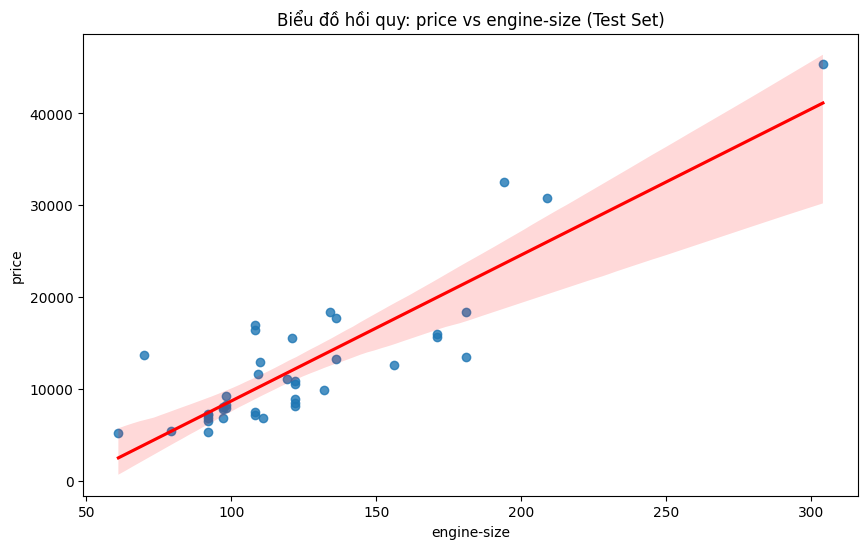

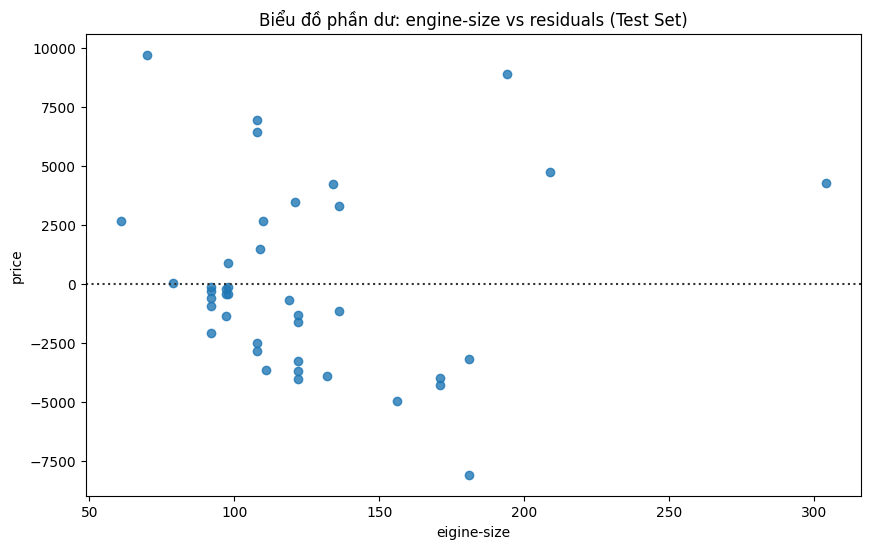

In [52]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test_simple['engine-size'], y=y_test_simple, line_kws={"color": "red"})
plt.title('Biểu đồ hồi quy: price vs engine-size (Test Set)')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

# Residual Plot
residuals_simple = y_test_simple - y_pred_simple
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test_simple['engine-size'], y=y_test_simple)
plt.title('Biểu đồ phần dư: engine-size vs residuals (Test Set)')
plt.xlabel('eigine-size')
plt.ylabel('price')
plt.show()

#### Nhận xét mô hình Hồi quy tuyến tính đơn biến

- MAE = 3005.22 có nghĩa là, trung bình, dự đoán của mô hình sai lệch khoảng 3005$ so với giá xe thực tế.

- RMSE = 3898.79, cao hơn MAE, vì RMSE "phạt" nặng hơn cho các lỗi lớn. Sự chênh lệch này cho thấy có một số dự đoán sai lệch khá nhiều so với thực tế (có thể quan sát các trường hợp nằm lệch đường màu đỏ ở ở Regression Plot

- với mỗi một đơn vị engine-size tăng lên, mô hình dự đoán giá xe sẽ tăng thêm khoảng 171 đô

- Nhìn vào biểu đồ cho thấy phần dư (sai số) ta thấy sai số không phân tán một cách ngẫu nhiên. thay vào đó, biểu đồ có hình phễu nằm ngang.

- Mặc dù Regression Plot cho thấy mô hình đã nắm bắt được xu hướng chung, Residual Plot lại chỉ ra rằng mô hình không phù hợp (not a good fit) trên toàn bộ tập dữ liệu. Độ chính xác của mô hình giảm đi đáng kể đối với những chiếc xe đắt tiền có động cơ lớn.

- Bởi vậy, ta có thể nói độ tin cậy của mô hình này không đồng đều, động cơ nhỏ thì mô hình hoạt động tốt, nhưng lại không đnág tin cậy khi kích thước động cơ tăng lên.

#### Xây dựng Mô hình Hồi quy Tuyến tính Đa biến

In [47]:
# 1. Khởi tạo LinearRegression
lm_multiple = LinearRegression()

# 2. Xây dựng mô hình bằng phương thức fit() trên tập huấn luyện
lm_multiple.fit(X_train_multiple, y_train_multiple)

# Lấy giá trị intercept (b0) và coefficients (b1, b2, b3, ...)
b0_multiple = lm_multiple.intercept_
b_multiple = lm_multiple.coef_

print(f"Mô hình: price = {b0_multiple:.2f}")
for i, col in enumerate(X_multiple.columns):
    print(f"          + {b_multiple[i]:.2f} * {col}")


# 3. Dự đoán giá trên tập kiểm tra
y_pred_multiple = lm_multiple.predict(X_test_multiple)

# Dự đoán mẫu một vài giá trị
print("\nDự đoán mẫu trên tập kiểm tra:")
sample_indices_multiple = X_test_multiple.head(5).index
sample_predictions_multiple = y_pred_multiple[:5]
sample_actual_multiple = y_test_multiple.head(5)

sample_results_multiple = pd.DataFrame({'Actual Price': sample_actual_multiple, 'Predicted Price': sample_predictions_multiple})
print(sample_results_multiple)


# 4. Đánh giá mô hình
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)

print("\nĐánh giá Mô hình Hồi quy Tuyến tính Đa biến:")
print(f"  MAE: {mae_multiple:.2f}")
print(f"  RMSE: {rmse_multiple:.2f}")


Mô hình: price = -14630.18
          + 70.93 * engine-size
          + 53.04 * horsepower
          + 5.18 * curb-weight

Dự đoán mẫu trên tập kiểm tra:
     Actual Price  Predicted Price
95          15690     22002.793327
15          18344     12688.608991
30           6488      5628.514182
158         10595     10841.243105
128          9895     13013.780807

Đánh giá Mô hình Hồi quy Tuyến tính Đa biến:
  MAE: 3056.09
  RMSE: 3921.43


#### Trực quan hóa Mô hình Hồi quy Tuyến tính Đa biến (Residual Plot)

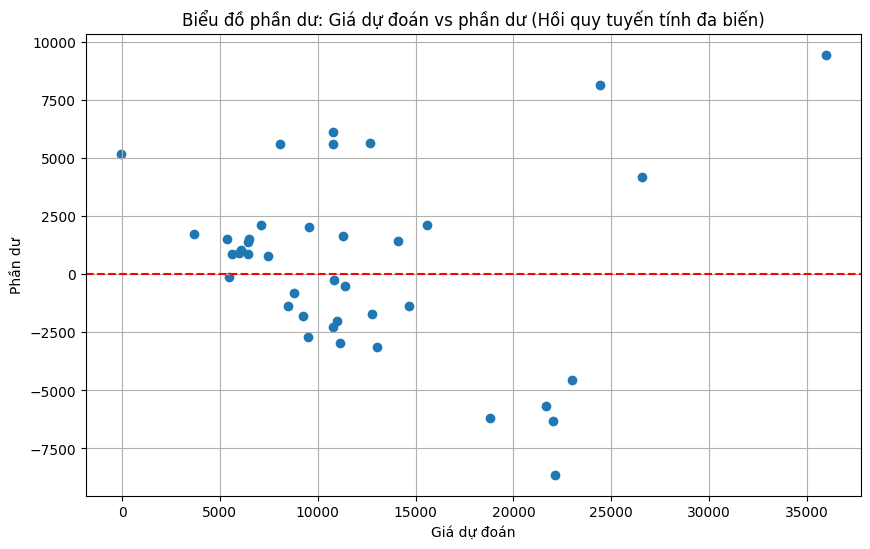

In [50]:
# Residual Plot cho mô hình đa biến
residuals_multiple = y_test_multiple - y_pred_multiple
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ phân tán của residuals so với predicted values
plt.scatter(y_pred_multiple, residuals_multiple)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Biểu đồ phần dư: Giá dự đoán vs phần dư (Hồi quy tuyến tính đa biến)')
plt.xlabel('Giá dự đoán')
plt.ylabel('Phần dư')
plt.grid(True)
plt.show()


#### Nhận xét mô hình hồi quy tuyến tính đa biến:

- RMSE (3921.43) lớn hơn đáng kể so với MAE (3056.09), chứng tỏ vẫn còn tồn tại một số dự đoán bị lệch giá rất nhiều.
- Biểu đồ phần dư cho thấy phần lớn các điểm dữ liệu phân tán xung quanh đường zero, không có đường cong hay đường parabol rõ rệt nào
- thêm các biến horsepower và curb-weight đã giúp mô hình giải thích được sự biến thiên của dữ liệu một cách tuyến tính
- phân bố các điểm vẫn không đồng đều trên toàn bộ phạm vi dự đoán. Biểu đồ vẫn có dấu hiệu của hình chiếc phễu nằm ngang. Ví dụ: các mức giá dự đoán cao (trục hoành > 20,000 đô), sai số trở nên rất lớn và phân tán rộng hơn nhiều, với các lỗi lên đến gần 10,000 đô

## Câu 3: Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức đơn biến. đánh giá các mô hình bằng thang đo đã học

### Xây dựng Mô hình Hồi quy Đa thức Đơn biến

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# tương tự như câu 2, chọn biến độc lập là biến tương quan mạnh nhất đến price
X_poly_simple = df[['engine-size']]
y_poly_simple = df['price']

# Chia dữ liệu
X_train_poly_simple, X_test_poly_simple, y_train_poly_simple, y_test_poly_simple = train_test_split(X_poly_simple, y_poly_simple, test_size=0.2, random_state=42)

# Khởi tạo PolynomialFeatures để tạo các biến đa thức (ví dụ: bậc 2 và bậc 3)
# Tạo biến x và x^2
pr_degree2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_degree2 = pr_degree2.fit_transform(X_train_poly_simple)
X_test_poly_degree2 = pr_degree2.transform(X_test_poly_simple)

print(f"Kích thước tập huấn luyện sau khi biến đổi đa thức (bậc 2): {X_train_poly_degree2.shape}")

# Xây dựng mô hình hồi quy tuyến tính trên dữ liệu đã biến đổi đa thức (bậc 2)
lm_poly_degree2 = LinearRegression()
lm_poly_degree2.fit(X_train_poly_degree2, y_train_poly_simple)
print("\nMô hình Đa thức Bậc 2 (sử dụng engine-size):")
print(f"  Intercept: {lm_poly_degree2.intercept_:.2f}")
print(f"  Coefficients: {lm_poly_degree2.coef_}")


Kích thước tập huấn luyện sau khi biến đổi đa thức (bậc 2): (160, 2)

Mô hình Đa thức Bậc 2 (sử dụng engine-size):
  Intercept: -11752.24
  Coefficients: [ 2.16862517e+02 -1.41118091e-01]


### Đánh giá Mô hình Hồi quy Đa thức Đơn biến

In [62]:
# Dự đoán trên tập kiểm tra
y_pred_poly_degree2 = lm_poly_degree2.predict(X_test_poly_degree2)
y_pred_poly_degree3 = lm_poly_degree3.predict(X_test_poly_degree3)

# Đánh giá mô hình bậc 2
mae_poly_degree2 = mean_absolute_error(y_test_poly_simple, y_pred_poly_degree2)
mse_poly_degree2 = mean_squared_error(y_test_poly_simple, y_pred_poly_degree2)
rmse_poly_degree2 = np.sqrt(mse_poly_degree2)
r2_poly_degree2 = r2_score(y_test_poly_simple, y_pred_poly_degree2)

# Tính RSE cho mô hình bậc 2
n_poly = len(y_test_poly_simple)
p_poly_degree2 = X_test_poly_degree2.shape[1]
ssr_poly_degree2 = mse_poly_degree2 * n_poly
rse_poly_degree2 = np.sqrt(ssr_poly_degree2 / (n_poly - p_poly_degree2 - 1)) if (n_poly - p_poly_degree2 - 1) > 0 else np.nan


print("\nĐánh giá Mô hình Hồi quy Đa thức Đơn biến (Bậc 2):")
print(f"  MAE: {mae_poly_degree2:.2f}")
print(f"  RMSE: {rmse_poly_degree2:.2f}")
print(f"  R-squared (R2): {r2_poly_degree2:.4f}")
print(f"  RSE: {rse_poly_degree2:.2f}")



Đánh giá Mô hình Hồi quy Đa thức Đơn biến (Bậc 2):
  MAE: 3154.27
  RMSE: 4085.63
  R-squared (R2): 0.7367
  RSE: 4248.04


### Trực quan hóa Mô hình Hồi quy Đa thức Đơn biến

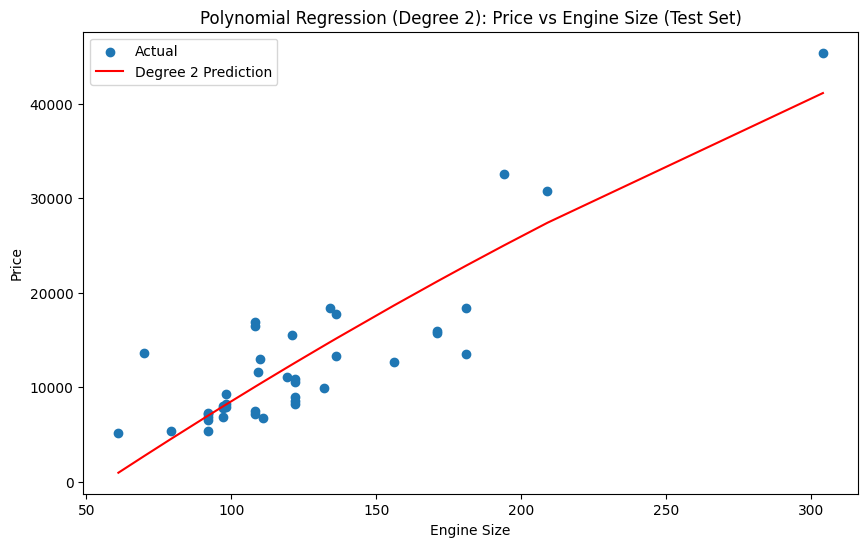

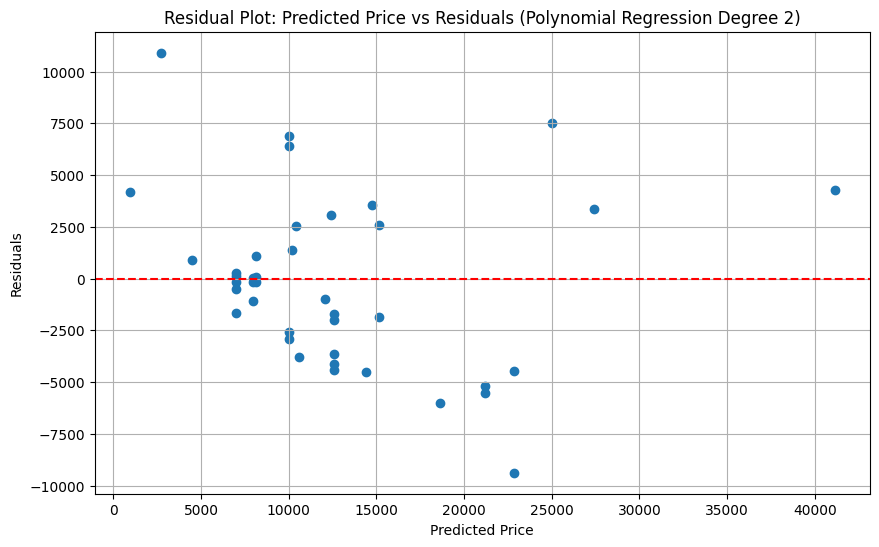

In [60]:
# Trực quan hóa mô hình bậc 2
plt.figure(figsize=(10, 6))
# Sắp xếp dữ liệu để vẽ đường cong mượt mà hơn
X_test_poly_simple_sorted = X_test_poly_simple.sort_values(by='engine-size')
y_pred_poly_degree2_sorted = lm_poly_degree2.predict(pr_degree2.transform(X_test_poly_simple_sorted))

plt.scatter(X_test_poly_simple, y_test_poly_simple, label='Actual')
plt.plot(X_test_poly_simple_sorted, y_pred_poly_degree2_sorted, color='red', label='Degree 2 Prediction')
plt.title('hồi quy đa thức đơn biến bậc 2: price vs engine-size (Test Set)')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.legend()
plt.show()

# Residual Plot cho mô hình bậc 2
residuals_poly_degree2 = y_test_poly_simple - y_pred_poly_degree2
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly_degree2, residuals_poly_degree2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Biểu đồ phần dư: giá dự kiến vs phần dư (hồi quy đa thức đơn biến bậc 2)')
plt.xlabel('giá dự kiến')
plt.ylabel('phần dư')
plt.grid(True)
plt.show()


### Nhận xét mô hình hồi quy đa thức đơn biến bậc 2

- MAE (3154.27) và RMSE (4085.63) chứng tỏ sai số tuyệt đối trung bình là 3154 đô
và sai số căn bậc hai trung bình là 4085 đô
- giống với câu 2, RMSE cao hơn đáng kể so với MAE
- R-squared = 0.7367: mô hình này có thể giải thích được khoảng 73.67% sự biến thiêncủa giá xe
- RSE = 4248.04: Trung bình, một dự đoán của mô hình có thể lệch khỏi giá trị thực tế khoảng 4248 đô
- Vì vậy, ta kết luận rằng mô hình hồi quy đa thức đơn biến bậc 2 này không phải là một sự cải thiện so với các mô hình tuyến tính trước đó

## Câu 4: Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức nhiều biến. đánh giá các mô hình bằng thang đo đã học

### Chuẩn bị dữ liệu: Chọn biến và Biến đổi Đa thức

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Chọn các biến kiểu số có tương quan mạnh với giá từ kết quả ở c1 cho mô hình đa biến
selected_numerical_features_for_poly_multiple = ['engine-size', 'horsepower', 'curb-weight']
X_multi_poly = df[selected_numerical_features_for_poly_multiple]
y_multi_poly = df['price']

# Khởi tạo PolynomialFeatures để tạo các biến đa thức bậc 2
# include_bias=False để tránh cột hệ số chặn trùng lặp khi fit LinearRegression
pr_multi_degree2 = PolynomialFeatures(degree=2, include_bias=False)

# Biến đổi các biến đã chọn thành các biến đa thức
X_multi_poly_degree2 = pr_multi_degree2.fit_transform(X_multi_poly)

print(f"Các biến gốc được chọn cho mô hình đa thức nhiều biến: {selected_numerical_features_for_poly_multiple}")
print(f"Số lượng biến sau khi biến đổi đa thức bậc 2: {X_multi_poly_degree2.shape[1]}")

# Chia dữ liệu đã biến đổi thành tập huấn luyện và tập kiểm tra
X_train_multi_poly_degree2, X_test_multi_poly_degree2, y_train_multi_poly_degree2, y_test_multi_poly_degree2 = train_test_split(X_multi_poly_degree2, y_multi_poly, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện sau khi biến đổi đa thức: {X_train_multi_poly_degree2.shape}")
print(f"Kích thước tập kiểm tra sau khi biến đổi đa thức: {X_test_multi_poly_degree2.shape}")

Các biến gốc được chọn cho mô hình đa thức nhiều biến: ['engine-size', 'horsepower', 'curb-weight']
Số lượng biến sau khi biến đổi đa thức bậc 2: 9
Kích thước tập huấn luyện sau khi biến đổi đa thức: (160, 9)
Kích thước tập kiểm tra sau khi biến đổi đa thức: (40, 9)


### Xây dựng mô hình giờồi quy đa thức nhiều biến

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo LinearRegression
lm_multi_poly_degree2 = LinearRegression()

# Xây dựng mô hình bằng phương thức fit() trên tập huấn luyện đã biến đổi
lm_multi_poly_degree2.fit(X_train_multi_poly_degree2, y_train_multi_poly_degree2)

# Lấy giá trị intercept và coefficients
b0_multi_poly_degree2 = lm_multi_poly_degree2.intercept_
b_multi_poly_degree2 = lm_multi_poly_degree2.coef_

print(f"Mô hình Đa thức Nhiều Biến Bậc 2:")
print(f"  Intercept: {b0_multi_poly_degree2:.2f}")
print(f"  Coefficients (tương ứng với các biến sau biến đổi đa thức): {b_multi_poly_degree2}")


# Dự đoán giá trên tập kiểm tra
y_pred_multi_poly_degree2 = lm_multi_poly_degree2.predict(X_test_multi_poly_degree2)

# Dự đoán mẫu một vài giá trị
print("\nDự đoán mẫu trên tập kiểm tra:")
# Để hiển thị giá trị gốc cùng với dự đoán, chúng ta cần dữ liệu gốc hoặc chỉ hiển thị index và giá trị
sample_indices_multi_poly_degree2 = y_test_multi_poly_degree2.head(5).index
sample_predictions_multi_poly_degree2 = y_pred_multi_poly_degree2[:5]
sample_actual_multi_poly_degree2 = y_test_multi_poly_degree2.head(5)

sample_results_multi_poly_degree2 = pd.DataFrame({'Actual Price': sample_actual_multi_poly_degree2, 'Predicted Price': sample_predictions_multi_poly_degree2})
print(sample_results_multi_poly_degree2)

Mô hình Đa thức Nhiều Biến Bậc 2:
  Intercept: 3974.16
  Coefficients (tương ứng với các biến sau biến đổi đa thức): [-2.72733838e+01  1.64456816e+02 -8.36933656e+00 -2.11643566e-01
 -8.27807302e-01  8.80249808e-02  1.18336675e+00 -9.69250300e-02
  2.23650550e-03]

Dự đoán mẫu trên tập kiểm tra:
     Actual Price  Predicted Price
95          15690     21000.248915
15          18344     13220.161039
30           6488      6122.756988
158         10595     10133.088996
128          9895     11973.287919


### Đánh giá \mô hình

In [65]:
# Đánh giá mô hình bậc 2
mse_multi_poly_degree2 = mean_squared_error(y_test_multi_poly_degree2, y_pred_multi_poly_degree2)
rmse_multi_poly_degree2 = np.sqrt(mse_multi_poly_degree2)
r2_multi_poly_degree2 = r2_score(y_test_multi_poly_degree2, y_pred_multi_poly_degree2)

# Tính RSE (Residual Standard Error)
n_multi_poly_degree2 = len(y_test_multi_poly_degree2)
p_multi_poly_degree2 = X_test_multi_poly_degree2.shape[1]
# Kiểm tra để tránh chia cho số âm hoặc 0
if (n_multi_poly_degree2 - p_multi_poly_degree2 - 1) > 0:
    ssr_multi_poly_degree2 = mse_multi_poly_degree2 * n_multi_poly_degree2
    rse_multi_poly_degree2 = np.sqrt(ssr_multi_poly_degree2 / (n_multi_poly_degree2 - p_multi_poly_degree2 - 1))
else:
    rse_multi_poly_degree2 = np.nan # Hoặc một giá trị thích hợp khác


# Tính CV (Coefficient of Variation)
mean_y_multi_poly_degree2 = np.mean(y_test_multi_poly_degree2)
cv_multi_poly_degree2 = (rmse_multi_poly_degree2 / mean_y_multi_poly_degree2) if mean_y_multi_poly_degree2 > 0 else np.nan


print("\nĐánh giá Mô hình Hồi quy Đa thức Nhiều Biến (Bậc 2):")
print(f"  RMSE: {rmse_multi_poly_degree2:.2f}")
print(f"  R-squared (R2): {r2_multi_poly_degree2:.4f}")
print(f"  RSE: {rse_multi_poly_degree2:.2f}")
print(f"  CV: {cv_multi_poly_degree2:.4f}")


Đánh giá Mô hình Hồi quy Đa thức Nhiều Biến (Bậc 2):
  RMSE: 3713.43
  R-squared (R2): 0.7825
  RSE: 4287.90
  CV: 0.2956


### Trực quan hóa mô hình

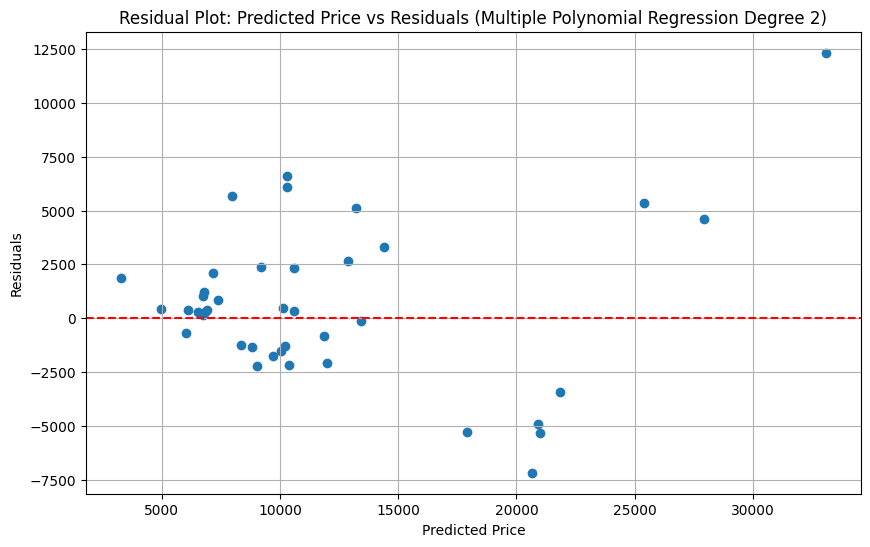

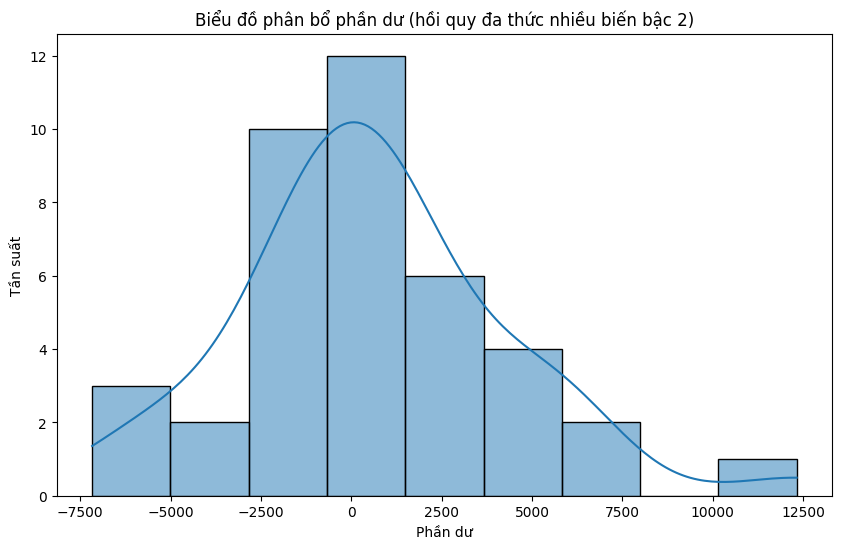

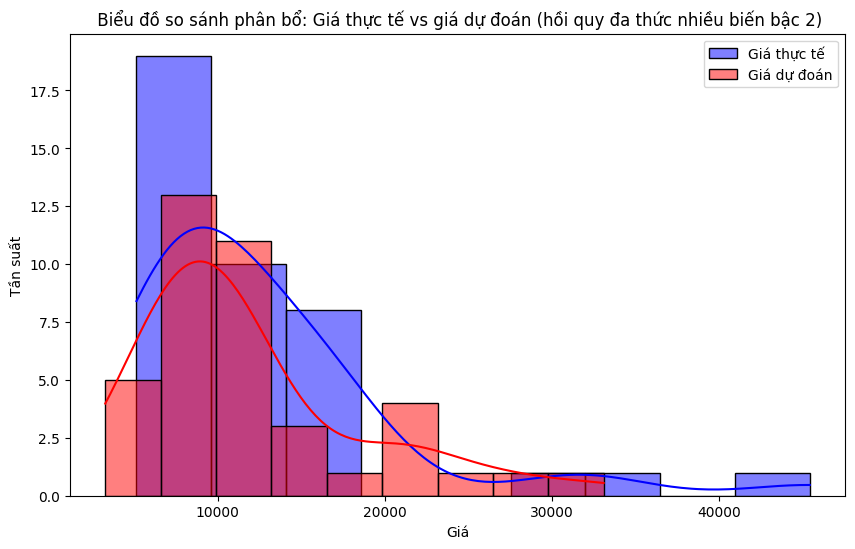

In [68]:
# Residual Plot
residuals_multi_poly_degree2 = y_test_multi_poly_degree2 - y_pred_multi_poly_degree2
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi_poly_degree2, residuals_multi_poly_degree2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Predicted Price vs Residuals (Multiple Polynomial Regression Degree 2)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Distribution Plot của Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_multi_poly_degree2, kde=True)
plt.title('Biểu đồ phân bổ phần dư (hồi quy đa thức nhiều biến bậc 2)')
plt.xlabel('Phần dư')
plt.ylabel('Tần suất')
plt.show()

# Distribution Plot so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
sns.histplot(y_test_multi_poly_degree2, kde=True, color="blue", label="Giá thực tế")
sns.histplot(y_pred_multi_poly_degree2, kde=True, color="red", label="Giá dự đoán")
plt.title(' Biểu đồ so sánh phân bổ: Giá thực tế vs giá dự đoán (hồi quy đa thức nhiều biến bậc 2)')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

### Nhận xét mô hình

- RMSE (Root Mean Squared Error) = 3713.43: Sai số căn bậc hai trung bình là 3713$. Đây là giá trị thấp nhất trong tất cả các model cho tới hiện tại.
- R-squared = 0.7825: Mô hình này có thể giải thích được 78.25% sự biến thiên của giá xe, một sự cải thiện so với mức 73.67% của đa thức đơn biến bậc 2
- CV (Coefficient of Variation) = 0.2956. Hệ số biến thiên là 0.2956 hay 29.56%. Sai số trung bình của mô hình tương đương khoảng 29.6% giá trị trung bình của một chiếc xe
- Kết luận: mô hình hồi quy đa thức nhiều biến bậc 2 là mô hình phù hợp nhất trong số các mô hình đã được khảo sát từ câu 2 đến câu 4. Bằng chứng: mô hình này đạt được RMSE thấp nhất và R-squared cao nhất. Ngoài ra, biểu đồ phân phối cho thấy sự khớp nhau tốt giữa dự đoán và thực tế.

## Câu 5: Chọn **các biến** có khả năng ảnh hưởng đến giá xe. xây dựng mô hình **hồi quy** phù hợp cho bộ dữ liệu để dự đoán giá xe

### Chuẩn bị dữ liệu

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Bước 1: Chọn các biến có ảnh hưởng nhất để tránh overfitting
# Chọn 4 biến SỐ có tương quan mạnh nhất và ít đa cộng tuyến với nhau
top_numerical_features = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']

# Giữ nguyên các biến PHÂN LOẠI có ảnh hưởng
selected_categorical_features = ['make', 'body-style', 'drive-wheels', 'engine-location']

# Bước 2: Tạo DataFrame cho các biến đã chọn
X_numerical = df[top_numerical_features]
X_categorical = df[selected_categorical_features]

# Bước 3: Mã hóa One-Hot cho các biến phân loại
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Bước 4: Kết hợp các biến số và biến phân loại đã mã hóa
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Biến mục tiêu
y = df['price']

print(f"Số lượng biến độc lập trước khi biến đổi đa thức: {X.shape[1]}")

# Bước 5: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 6: In kích thước các tập dữ liệu
print(f"\nKích thước tập huấn luyện X: {X_train.shape}")
print(f"Kích thước tập kiểm tra X: {X_test.shape}")

Số lượng biến độc lập trước khi biến đổi đa thức: 32

Kích thước tập huấn luyện X: (160, 32)
Kích thước tập kiểm tra X: (40, 32)


### Tiền xử lý, Xây dựng Mô hình và Dự đoán

In [92]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Bước 1: Tách riêng các biến số và biến phân loại từ tập train và test
# Lấy danh sách tên các cột số và cột phân loại
numerical_cols = top_numerical_features
categorical_cols = X_categorical_encoded.columns

X_train_num = X_train[numerical_cols]
X_train_cat = X_train[categorical_cols]

X_test_num = X_test[numerical_cols]
X_test_cat = X_test[categorical_cols]

# Bước 2: Áp dụng PolynomialFeatures chỉ trên các biến số
pr = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pr.fit_transform(X_train_num)
X_test_poly = pr.transform(X_test_num) # Chỉ transform trên tập test

print(f"Số lượng biến số sau khi biến đổi đa thức bậc 2: {X_train_poly.shape[1]}")

# Bước 3: Chuẩn hóa (Scale) các biến đa thức vừa tạo
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly) # Chỉ transform trên tập test

# Bước 4: Kết hợp lại các biến số đã xử lý và các biến phân loại
# Dùng np.hstack để nối các mảng numpy
X_train_final = np.hstack([X_train_poly_scaled, X_train_cat.values])
X_test_final = np.hstack([X_test_poly_scaled, X_test_cat.values])

print(f"Tổng số biến cuối cùng để huấn luyện mô hình: {X_train_final.shape[1]}")

# --- XÂY DỰNG MÔ HÌNH ---
# Khởi tạo và huấn luyện mô hình trên dữ liệu cuối cùng
lm_final = LinearRegression()
lm_final.fit(X_train_final, y_train)

# Dự đoán giá trên tập kiểm tra cuối cùng
y_pred_final = lm_final.predict(X_test_final)

# Dự đoán mẫu một vài giá trị để kiểm tra
print("\nDự đoán mẫu trên tập kiểm tra:")
sample_results_final = pd.DataFrame({'Actual Price': y_test.head(), 'Predicted Price': y_pred_final[:5]})
print(sample_results_final.round(2))

Số lượng biến số sau khi biến đổi đa thức bậc 2: 14
Tổng số biến cuối cùng để huấn luyện mô hình: 42

Dự đoán mẫu trên tập kiểm tra:
     Actual Price  Predicted Price
95          15690         18588.22
15          18344         11914.46
30           6488          6947.66
158         10595          9549.13
128          9895          9650.25


### Trực quan hóa mô hình


Đánh giá Mô hình Cuối cùng:
  MAE: 1856.24
  RMSE: 2936.93
  R-squared (R2): 0.8639
  RSE: nan
  CV: 0.2338


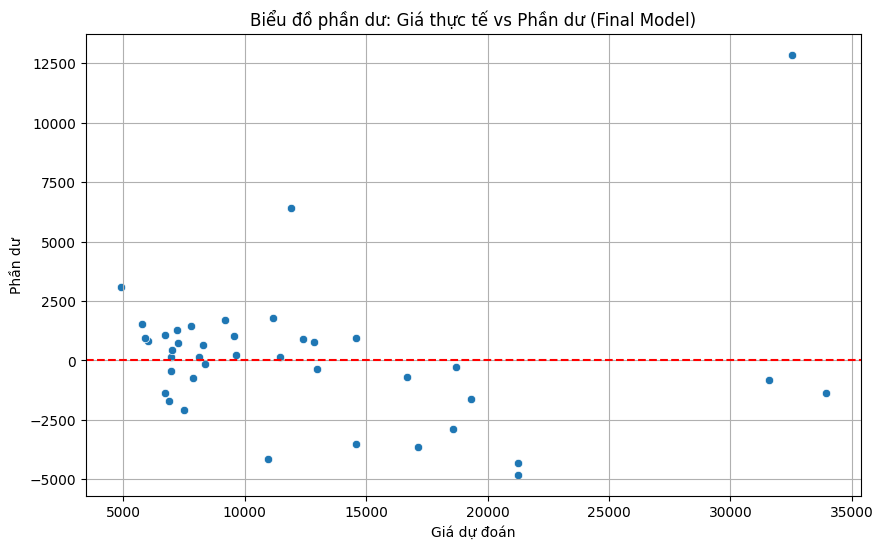

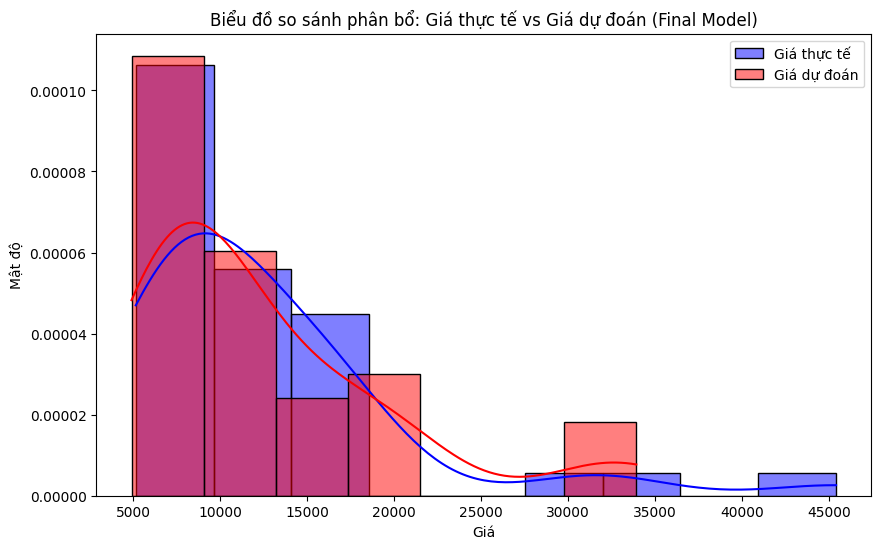

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán các thang đo
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

# Tính RSE (Residual Standard Error)
n_final = len(y_test)
p_final = X_test_final.shape[1]
# Công thức RSE chỉ đúng khi n > p + 1
if (n_final - p_final - 1) > 0:
    ssr_final = np.sum((y_test - y_pred_final)**2)
    rse_final = np.sqrt(ssr_final / (n_final - p_final - 1))
else:
    rse_final = np.nan # Sẽ không bị nan nữa

# Tính CV (Coefficient of Variation)
mean_y_test = np.mean(y_test)
cv_final = (rmse_final / mean_y_test) if mean_y_test > 0 else np.nan

print("\nĐánh giá Mô hình Cuối cùng:")
print(f"  MAE: {mae_final:.2f}")
print(f"  RMSE: {rmse_final:.2f}")
print(f"  R-squared (R2): {r2_final:.4f}")
print(f"  RSE: {rse_final:.2f}")
print(f"  CV: {cv_final:.4f}")

# Trực quan hóa: Residual Plot
residuals_final = y_test - y_pred_final
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals_final)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Biểu đồ phần dư: Giá thực tế vs Phần dư (Final Model)')
plt.xlabel('Giá dự đoán')
plt.ylabel('Phần dư')
plt.grid(True)
plt.show()

# Trực quan hóa: Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, color="blue", label="Giá thực tế", stat="density")
sns.histplot(y_pred_final, kde=True, color="red", label="Giá dự đoán", stat="density")
plt.title('Biểu đồ so sánh phân bổ: Giá thực tế vs Giá dự đoán (Final Model)')
plt.xlabel('Giá')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

### Nhận xét mô hình

- MAE (1856.24) & RMSE (2936.93): Lần đầu tiên, sai số tuyệt đối trung bình đã giảm xuống dưới 2000$. Chỉ số RMSE (nhạy cảm với lỗi lớn) đã giảm mạnh, cho thấy mô hình không chỉ chính xác hơn về trung bình mà còn xử lý tốt hơn các trường hợp ngoại lệ.
- R-squared = 0.8639: Mô hình của giờ đây có thể giải thích được 86.4% sự biến thiên của giá xe.
- CV (0.2338): Hệ số biến thiên là 23.4%. Mặc dù vẫn còn sai số, nhưng đã giảm đáng kể so với mức ~30% của các mô hình câu trước.
- Quan sát vào biểu đồ phần dư, ta có thể thấy các điểm đã phân tán ngẫu nhiên và đồng đều hơn xung quanh đường zero, mặc dù vẫn còn một số trường hợp ngoại lệ.
- Kết luận: Ta có thể cho rằng, cho tới hiện tại, đây là mô hình có độ chính xác cao nhất.

## Câu 6: Tìm mô hình khác thích hợp hơn để dự đoán giá xe (nếu có)

### Đề xuất mô hình:

- Vấn đề của mô hình cũ: Mô hình đa thức của chúng ta tạo ra rất nhiều biến, một số biến có thể bị tương quan với nhau (đa cộng tuyến) và một số có thể không quá quan trọng. LinearRegression cố gắng tìm hệ số cho tất cả chúng, có thể dẫn đến mô hình quá nhạy cảm với dữ liệu huấn luyện.

- Giải pháp của Ridge: Ridge Regression cũng tìm các hệ số như LinearRegression nhưng nó thêm vào một "hình phạt" (penalty) cho các hệ số có giá trị lớn. Điều này buộc mô hình phải ưu tiên các biến thực sự quan trọng và "co lại" (shrink) hệ số của các biến ít quan trọng hơn về gần 0.

- Kết quả: Mô hình trở nên ổn định hơn, ít bị overfitting hơn và thường cho kết quả dự đoán tốt hơn trên dữ liệu mới.

### Chuẩn bị dữ liệu

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Bước 1: Chọn các biến có ảnh hưởng nhất
top_numerical_features = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
selected_categorical_features = ['make', 'body-style', 'drive-wheels', 'engine-location']

# Bước 2: Tạo DataFrame cho các biến đã chọn
X_numerical = df[top_numerical_features]
X_categorical = df[selected_categorical_features]

# Bước 3: Mã hóa One-Hot cho các biến phân loại
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Bước 4: Kết hợp các biến số và biến phân loại đã mã hóa
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Biến mục tiêu
y = df['price']

print(f"Số lượng biến độc lập TRƯỚC khi biến đổi đa thức: {X.shape[1]}")

# Bước 5: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 6: In kích thước các tập dữ liệu
print(f"\nKích thước tập huấn luyện X: {X_train.shape}")
print(f"Kích thước tập kiểm tra X: {X_test.shape}")

Số lượng biến độc lập TRƯỚC khi biến đổi đa thức: 32

Kích thước tập huấn luyện X: (160, 32)
Kích thước tập kiểm tra X: (40, 32)


### Tiền xử lý, xây dựng mô hình và dự đoán

In [99]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

# --- Xử lý ---

# Bước 1: Tách riêng các biến số và biến phân loại
numerical_cols = top_numerical_features
categorical_cols = X_categorical_encoded.columns
X_train_num, X_train_cat = X_train[numerical_cols], X_train[categorical_cols]
X_test_num, X_test_cat = X_test[numerical_cols], X_test[categorical_cols]

# Bước 2: Áp dụng PolynomialFeatures CHỈ trên các biến số
pr = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pr.fit_transform(X_train_num)
X_test_poly = pr.transform(X_test_num)

# Bước 3: Chuẩn hóa các biến đa thức vừa tạo
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Bước 4: Kết hợp lại các biến
X_train_final = np.hstack([X_train_poly_scaled, X_train_cat.values])
X_test_final = np.hstack([X_test_poly_scaled, X_test_cat.values])

print(f"Tổng số biến cuối cùng để huấn luyện mô hình: {X_train_final.shape[1]}")

# --- xây dựng mô hình Ridge ---
# Khởi tạo và huấn luyện mô hình Ridge
# alpha là tham số quyết định "độ mạnh" của hình phạt. alpha=1.0 là giá trị khởi đầu.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_final, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred_ridge = ridge_model.predict(X_test_final)

# Dự đoán mẫu một vài giá trị để kiểm tra
print("\nDự đoán mẫu trên tập kiểm tra (Ridge Model):")
sample_results_ridge = pd.DataFrame({'Actual Price': y_test.head(), 'Predicted Price': y_pred_ridge[:5]})
print(sample_results_ridge.round(2))

Tổng số biến cuối cùng để huấn luyện mô hình: 42

Dự đoán mẫu trên tập kiểm tra (Ridge Model):
     Actual Price  Predicted Price
95          15690         19224.07
15          18344         12778.54
30           6488          5890.13
158         10595          9770.28
128          9895         10388.94


### Trực quan hóa mô hình


Đánh giá Mô hình Cải tiến (Ridge Regression):
  MAE: 1665.06
  RMSE: 2419.07
  R-squared (R2): 0.9077
  RSE: nan
  CV: 0.1926


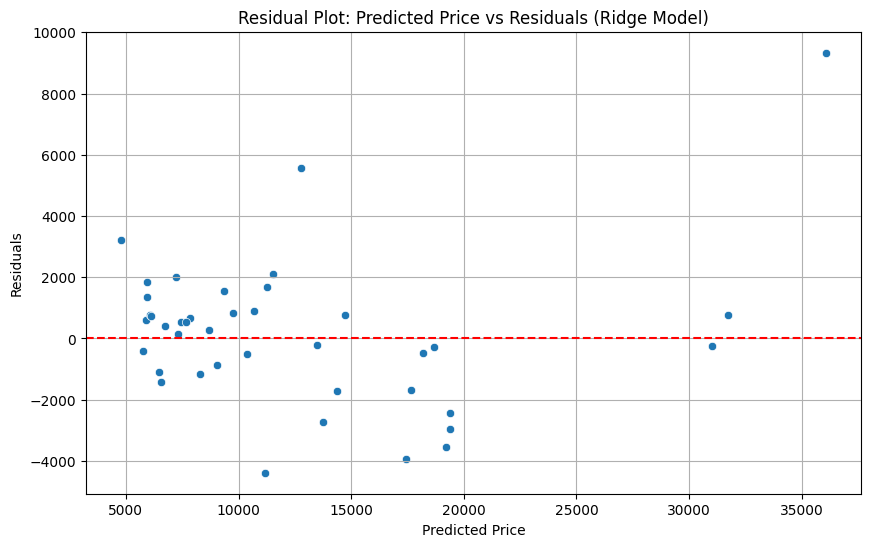

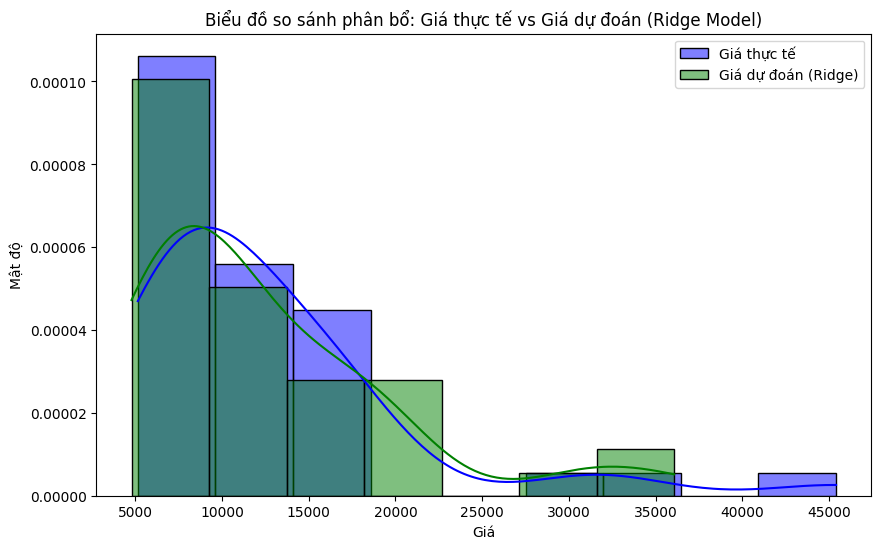

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Đánh giá mô hình
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Tính RSE
n_ridge = len(y_test)
p_ridge = X_test_final.shape[1]
if (n_ridge - p_ridge - 1) > 0:
    ssr_ridge = np.sum((y_test - y_pred_ridge)**2)
    rse_ridge = np.sqrt(ssr_ridge / (n_ridge - p_ridge - 1))
else:
    rse_ridge = np.nan

# Tính CV
mean_y_test = np.mean(y_test)
cv_ridge = (rmse_ridge / mean_y_test) if mean_y_test > 0 else np.nan

print("\nĐánh giá Mô hình Cải tiến (Ridge Regression):")
print(f"  MAE: {mae_ridge:.2f}")
print(f"  RMSE: {rmse_ridge:.2f}")
print(f"  R-squared (R2): {r2_ridge:.4f}")
print(f"  RSE: {rse_ridge:.2f}")
print(f"  CV: {cv_ridge:.4f}")


# Trực quan hóa: Residual Plot
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Predicted Price vs Residuals (Ridge Model)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Trực quan hóa: Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, color="blue", label="Giá thực tế", stat="density")
sns.histplot(y_pred_ridge, kde=True, color="green", label="Giá dự đoán (Ridge)", stat="density")
plt.title('Biểu đồ so sánh phân bổ: Giá thực tế vs Giá dự đoán (Ridge Model)')
plt.xlabel('Giá')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

### Đánh giá mô hình:

- Nhìn vào mô hình, ta thấy mặc dù vẫn có một vài điểm ngoại lệ ở phía giá cao (như điểm có sai số > 8000 đô), mô hình này vẫn cho ra một sự phân tán ngẫu nhiên và đồng đều hơn. Ngoài ra, các điểm phân bố khá cân bằng cả ở phía trên và phía dưới đường zero, chứng tỏ mô hình Ridge Recession đã đạt được sự ổn định tốt hơn những mô hình trước.

Khi so sánh trực tiếp với câu 5, ta thấy:

- MAE = 1665.06: Sai số trung bình điển hình đã giảm gần 200$ (1856.24).
- RMSE = 2419.07: RMSE giảm hơn 500 đô (2936.93)
- R-squared = 0.9077: Mô hình giờ có thể giải thích được gần 91% sự biến động của giá xe. Tăng 5% so với mô hình của câu 5 (0.8639)
- CV = 0.1926: Sai số tương đối so với giá trị trung bình của một chiếc xe đã giảm xuống dưới 20%, nhỏ hơn 4% so với mô hình câu 5 (0.2338)

- Điểm cuối cùng phải nhấn mạnh: Như đã đề cập ở mục thăm dò dữ liệu ở câu 1, ta nhận thấy dataset chứa những chiếc xe sedan thông thường giá 10,000 đô và cả những chiếc xe thể thao giá 40,000 đô, những chiếc xe có các giá trị ngoại lệ - thường là rất cao - sẽ khiến cho tất cả các mô hình đều mắc phải hiện tượng phương sai sai số thay đổi. Và vì thang đo RMSE phạt nặng các lỗi lớn, những mô hình được xây dựng từ dataset này sẽ luôn kém ổn định hơn so với những dataset khác.

Kết luận: Việc chuyển từ mô hình hồi quy đa thức nhiều biến nhiều loại sang Ridge Regression không chỉ cải thiện các chỉ số lỗi mà còn tạo ra một mô hình đáng tin cậy và mạnh mẽ hơn về mặt lý thuyết.